In [1]:
"""
CS 351 - Artificial Intelligence 
Assignment 3

Student ID = hf04097
"""

import numpy as np
import matplotlib.pyplot as plt


In [83]:
"""This function takes actual and predicted ratings and compute total mean square error(mse) in observed ratings.
"""
def computeError(R,predR):
    
    """Your code to calculate MSE goes here"""
    predR = np.asarray(predR)
    MSE = 0
    n =0
    for i in range(predR.shape[0]):
        for j in range(predR.shape[1]):
            if R[i,j]!= 0:
                MSE = MSE + np.square(np.subtract(R[i][j], predR[i][j]))
                n +=1
    MSE = MSE/n
    return MSE


In [84]:

"""
This fucntion takes P (m*k) and Q(k*n) matrices alongwith user bias (U) and item bias (I) and returns predicted rating. 
where m = No of Users, n = No of items
"""
def getPredictedRatings(P,Q,U,I):

    """Your code to predict ratinngs goes here"""  
    R_cap = np.zeros((P.shape[0],Q.shape[1]))
    for i in range(P.shape[0]):
        for j in range(Q.shape[1]):
            R_cap[i,j] = U[i] + I[j] + P[i, :].dot(Q[:,j])

    
    return R_cap

In [97]:
"""This fucntion runs gradient descent to minimze error in ratings by adjusting P, Q, U and I matrices based on gradients.
   The functions returns a list of (iter,mse) tuple that lists mse in each iteration
"""
def runGradientDescent(R,P,Q,U,I,iterations,alpha):
    iter_mse =[]
    
    for iter in range (iterations):
        R_cap = getPredictedRatings(P,Q,U,I)
        errorMatrix = np.zeros((P.shape[0],Q.shape[1])) 
        for i in range(P.shape[0]):
            for j in range(Q.shape[1]):
                errorMatrix[i,j] = R[i,j]-R_cap[i,j]
        for i in range(P.shape[0]):
            for j in range(Q.shape[1]):
                
                if R[i, j] == 0:
                    continue
                
                U[i] = U[i] - 2* alpha * (errorMatrix[i,j])
                I[j] = I[j] - 2*alpha * (errorMatrix[i,j])
                P[i,:] = P[i,:] + 2 * (alpha * (errorMatrix[i,j] * Q[:,j]))
                Q[:,j] = Q[:,j] + 2 * alpha * (errorMatrix[i,j] * P[i, :])
        
        iter_mse.append((iter,computeError(R,R_cap)))
    
    
    """"finally returns (iter,mse) values in a list"""
    return iter_mse

In [98]:
def matrixFactorization(R,k,iterations, alpha):

    """Your code to initialize P, Q, U and I matrices goes here. P and Q will be randomly initialized whereas U and I will be initialized as zeros. 
    Be careful about the dimension of these matrices
    """
    
    p_rows = R.shape[0]
    q_col = R.shape[1]
    P = np.random.rand(p_rows,k)
    Q = np.random.rand(k,q_col)
    U = np.zeros(p_rows)
    I = np.zeros(q_col)
    
    
    #Run gradient descent to minimize error
    stats = runGradientDescent(R,P,Q,U,I,iterations,alpha)
    print('P matrx:')
    print(P)
    print('Q matrix:')
    print(Q)
    print("User bias:")
    print(U)
    print("Item bias:")
    print(I)
    print("P x Q:")
    print(getPredictedRatings(P,Q,U,I))
    plotGraph(stats)

In [101]:
def plotGraph(stats):
    i = [i for i,e in stats]
    e = [e for i,e in stats]
    plt.plot(i,e)
    plt.xlabel("Iterations")
    plt.ylabel("Mean Square Error")
    plt.show()    

P matrx:
[[ 1.28162165  2.1600603   2.81266582]
 [ 0.85158861  1.35178137 -0.96535395]
 [ 2.80252534  1.44351118  0.63576142]
 [ 0.25760606  1.35611538  0.46295409]
 [ 1.49661319 -0.15820246  1.32189957]]
Q matrix:
[[ 0.86661254 -0.01966421  2.97503226  2.01828476  0.06498447  0.8667994 ]
 [-0.50286899  1.51581287  1.85804526  1.20086727  1.38079471  1.19421876]
 [ 2.01363082  0.72996108  2.12216021 -0.49875705  1.29291167  1.45514852]]
User bias:
[-2.26582464  1.30792601 -1.56070741 -0.05122691  0.34065695]
Item bias:
[ 1.57771203 -0.0363571  -2.30446483 -0.51196163 -0.43658917 -0.5175153 ]
P x Q:
[[5.         2.99999999 9.22499357 1.         4.         5.        ]
 [1.00000001 2.59919989 2.         4.6194998  1.54509204 1.73815651]
 [2.99999999 0.99999998 8.50372775 4.99999999 1.         3.00000001]
 [2.         2.30090599 1.91288108 1.3543468  1.99999999 1.94771595]
 [5.95672557 1.00000005 4.99999998 2.00000002 1.49197865 2.85503693]]
[(0, 5.914948778679426), (1, 5.807442758495824),

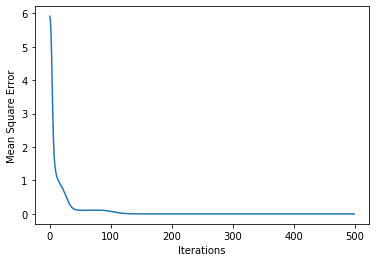

In [100]:
""""
User Item rating matrix given ratings of 5 users for 6 items.
Note: If you want, you can change the underlying data structure and can work with starndard python lists instead of np arrays
We may test with different matrices with varying dimensions and number of latent factors. Make sure your code works fine in those cases.
"""
R = np.array([
[5, 3, 0, 1, 4, 5],
[1, 0, 2, 0, 0, 0],
[3, 1, 0, 5, 1, 3],
[2, 0, 0, 0, 2, 0],
[0, 1, 5, 2, 0, 0],
])

R = np.asarray(R) #even if list is passed I want a numpy array
k = 3
alpha = 0.01
iterations = 500

matrixFactorization(R,k,iterations, alpha)


In [82]:
a = np.array([[1,2,3],[4,5,6]])
print(a)
a = np.asarray(a)
print(a)

[[1 2 3]
 [4 5 6]]
[[1 2 3]
 [4 5 6]]
